# 🏦 ATM Cash Demand Forecaster

In this notebook, we aim to build a predictive model to forecast ATM cash demand using financial indicators from the Reserve Bank of India (RBI)'s 2024 dataset. The goal is to ensure optimal cash availability in ATMs across regions, minimizing both cash-out risks and idle cash.

**Dataset Source**: The dataset used for this project is obtained from the official [Reserve Bank of India (RBI)](https://www.rbi.org.in) database. It contains financial indicators like inflation rate, interest rate, money supply, and cash withdrawal trends over time.

We will carry out the following steps:
- Import and understand the data
- Clean and preprocess it
- Perform feature selection and scaling
- Split the data for training and testing
- Train a hybrid deep learning models
- Evaluate model performance using relevant metrics


## Import the Dataset

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

# Load the Excel dataset
file_path = r"C:\Users\bhara\Desktop\rbi 2024.xlsx"  # Use raw string
xls = pd.ExcelFile(file_path)

# Assuming the first sheet contains the relevant data
df = pd.read_excel(xls, sheet_name=0)


**Creating a dataframe**


In [ ]:
# Initialize an empty list to hold reshaped data
reshaped_data = []

# Iterate through the DataFrame to extract relevant information
for i in range(len(df)):
    bank_name = df.iloc[i, 0]  # Bank Name
    if pd.isna(bank_name):     # Skip header or invalid rows
        continue
    for j in range(1, len(df.columns), 4):  # Step through columns in blocks of 4
        if j + 3 < len(df.columns):  # Ensure we don't go out of bounds
            month = df.columns[j]
            credit_volume = df.iloc[i, j]
            credit_value = df.iloc[i, j + 1]
            debit_volume = df.iloc[i, j + 2]
            debit_value = df.iloc[i, j + 3]
            reshaped_data.append([bank_name, month, credit_volume, credit_value, debit_volume, debit_value])

# Create a new DataFrame
final_df = pd.DataFrame(reshaped_data, columns=['Bank', 'Date', 'Credit_Volume', 'Credit_Value', 'Debit_Volume', 'Debit_Value'])

# Display
display(final_df.head())

,Bank,Date,Credit_Volume,Credit_Value,Debit_Volume,Debit_Value
0,BANK OF BARODA,2024-01-01,15840,73367.30000,24810278,1.198788e+08
1,BANK OF BARODA,2024-02-01,16216,76706.10000,24544489,1.201981e+08
2,BANK OF BARODA,2024-03-01,19170,92330.60000,26474545,1.307957e+08
3,BANK OF BARODA,2024-04-01,19695,96520.53646,25103105,1.251659e+08
4,BANK OF BARODA,2024-05-01,17763,87328.08900,24590143,1.207536e+08


## Data Cleaning and Feature Selection


In [20]:
# Filter for specific banks
selected_banks = [
    'STATE BANK OF INDIA',
    'BANK OF INDIA',
    'CANARA BANK',
]

final_df = final_df[final_df['Bank'].isin(selected_banks)]

# Handle missing values
final_df.fillna(method='ffill', inplace=True)

# Convert columns to numeric types
for col in ['Credit_Volume', 'Credit_Value', 'Debit_Volume', 'Debit_Value']:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# Check for any remaining NaN values after conversion
final_df.dropna(subset=['Credit_Volume', 'Credit_Value', 'Debit_Volume', 'Debit_Value'], inplace=True)

# Apply MinMax scaling
scaler = MinMaxScaler()
final_df[['Credit_Volume', 'Credit_Value', 'Debit_Volume', 'Debit_Value']] = scaler.fit_transform(final_df[['Credit_Volume', 'Credit_Value', 'Debit_Volume', 'Debit_Value']])

# Display the final DataFrame
display(final_df.head(200))

C:\Users\bhara\AppData\Local\Temp\ipykernel_6916\2697486817.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df.fillna(method='ffill', inplace=True)


,Bank,Date,Credit_Volume,Credit_Value,Debit_Volume,Debit_Value
12,BANK OF INDIA,2024-01-01,0.010423,0.015908,0.009554,0.006083
13,BANK OF INDIA,2024-02-01,0.007627,0.014114,0.006475,0.004802
14,BANK OF INDIA,2024-03-01,0.007376,0.013095,0.013953,0.011508
15,BANK OF INDIA,2024-04-01,0.000882,0.004335,0.008566,0.008010
16,BANK OF INDIA,2024-05-01,0.007018,0.012163,0.006691,0.005526
17,BANK OF INDIA,2024-06-01,0.004315,0.009254,0.004807,0.004064
18,BANK OF INDIA,2024-07-01,0.006638,0.011153,0.006061,0.003717
19,BANK OF INDIA,2024-08-01,0.004394,0.003426,0.007216,0.004143
20,BANK OF INDIA,2024-09-01,0.000000,0.000000,0.003821,0.001951
21,BANK OF INDIA,2024-10-01,0.008638,0.011166,0.015765,0.014303


## Visualising monthly trends (Credit card vs Debit card)

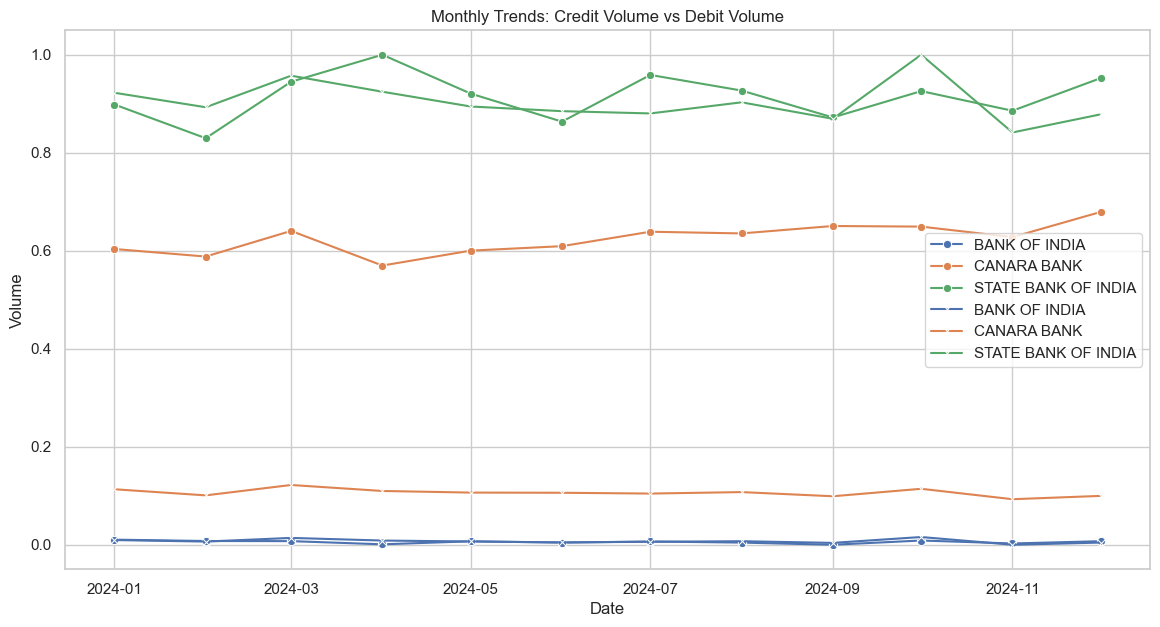

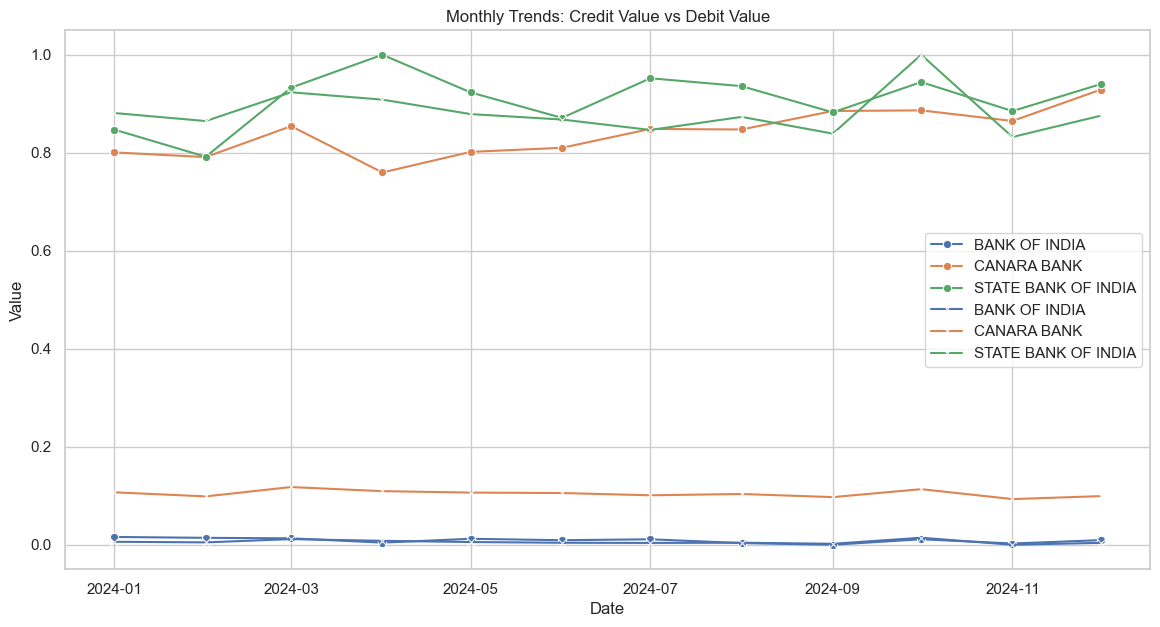

In [21]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot Credit Volume vs Debit Volume
plt.figure(figsize=(14, 7))
sns.lineplot(data=final_df, x='Date', y='Credit_Volume', hue='Bank', marker='o')
sns.lineplot(data=final_df, x='Date', y='Debit_Volume', hue='Bank', marker='x')
plt.title('Monthly Trends: Credit Volume vs Debit Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot Credit Value vs Debit Value
plt.figure(figsize=(14, 7))
sns.lineplot(data=final_df, x='Date', y='Credit_Value', hue='Bank', marker='o')
sns.lineplot(data=final_df, x='Date', y='Debit_Value', hue='Bank', marker='x')
plt.title('Monthly Trends: Credit Value vs Debit Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Training Models (ARIMA, SARIMAX, CNN-LSTM)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import plotly.express as px

forecast_results = {}

# Aggregate all banks for full series modeling
full_series = final_df.groupby('Date')[['Credit_Value', 'Debit_Value']].sum().sort_index()
y = full_series['Debit_Value']
x = full_series[['Credit_Value']]

predictions = pd.DataFrame()
metrics = {}

# %% [markdown]
# ### ARIMA Model

# %%
try:
    model_arima = ARIMA(y, order=(1, 0, 1)).fit()
    pred_arima = model_arima.predict(start=len(y)-6, end=len(y)-1)
    predictions['ARIMA'] = pred_arima
except Exception as e:
    print("ARIMA failed:", str(e))

# %% [markdown]
# ### SARIMAX Model (with Credit_Value as exog)

# %%
try:
    model_sarimax = SARIMAX(y, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), exog=x).fit()
    pred_sarimax = model_sarimax.predict(start=len(y)-6, end=len(y)-1, exog=x.iloc[len(y)-6:])
    predictions['SARIMAX'] = pred_sarimax
except Exception as e:
    print("SARIMAX failed:", str(e))

# CNN-LSTM Model
try:
    series = y.values.reshape(-1, 1)
    scaler_cnn = MinMaxScaler()
    series_scaled = scaler_cnn.fit_transform(series)
    n_steps = 3
    X_cnn, y_cnn = [], []
    for i in range(n_steps, len(series_scaled)):
        X_cnn.append(series_scaled[i-n_steps:i])
        y_cnn.append(series_scaled[i])
    X_cnn, y_cnn = np.array(X_cnn), np.array(y_cnn)
    X_cnn = X_cnn.reshape((X_cnn.shape[0], X_cnn.shape[1], 1))

    model_cnn = Sequential()
    model_cnn.add(Input(shape=(n_steps, 1)))
    model_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    model_cnn.add(MaxPooling1D(pool_size=1))
    model_cnn.add(LSTM(32, activation='tanh'))
    model_cnn.add(Dropout(0.1))
    model_cnn.add(Dense(1))
    model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_cnn.fit(X_cnn, y_cnn, epochs=50, batch_size=4, validation_split=0.2, callbacks=[early_stop], verbose=0)

    # Predict last sequence only
    last_seq = series_scaled[-n_steps:].reshape(1, n_steps, 1)
    pred_scaled = model_cnn.predict(last_seq)
    pred_cnn = scaler_cnn.inverse_transform(pred_scaled).flatten()[0]
    predictions['CNN-LSTM'] = pd.Series([pred_cnn], index=[y.index[-1]])

except Exception as e:
    print("CNN-LSTM failed:", str(e))


c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


## Comparing performances

In [23]:
for name, pred in predictions.items():
    if isinstance(pred, pd.Series):
        aligned = pred.index.intersection(y.index)
        actual = y.loc[aligned]
        pred = pred.loc[aligned]
        mask = ~(actual.isna() | pred.isna())
        actual = actual[mask]
        pred = pred[mask]
        if len(actual) > 0 and len(pred) > 0:
            accuracy = 1 - np.mean(np.abs((actual - pred) / actual))  # 1 - MAPE
            metrics[name] = {
                "MSE": mean_squared_error(actual, pred),
                "MAPE": mean_absolute_percentage_error(actual, pred),
                "R2": r2_score(actual, pred),
                "Accuracy": accuracy
            }

# %%
print("\nOverall Forecasting Results (Full Dataset):")
model_compare_list = []
for model, score in metrics.items():
    print(f"{model} -> MSE: {score['MSE']:.4f}, MAPE: {score['MAPE']:.2%}, R2: {score['R2']:.4f}, Accuracy: {score['Accuracy']:.2%}")
    model_compare_list.append([model, np.sqrt(score['MSE']), score['MAPE'] * 100, score['Accuracy'] * 100])

# %% [markdown]
# ### Plotting RMSE, MAPE, and Accuracy

# %%
if model_compare_list:
    model_compare_table = pd.DataFrame(model_compare_list, columns=['model', 'RMSE', 'MAPE', 'Accuracy'])
    model_compare_table = model_compare_table.sort_values('RMSE', ascending=False)
    model_compare_table = model_compare_table.round(2)

    try:
        fig = px.bar(model_compare_table, y='model', x='RMSE', color='RMSE', text='RMSE',
                     title='Validation RMSE Scores of Models (Full Dataset)', orientation='h')
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
    except Exception as e:
        print("Could not render RMSE plot:", e)

    try:
        fig = px.bar(model_compare_table, y='model', x='MAPE', color='MAPE', text='MAPE',
                     title='Validation MAPE Scores of Models (Full Dataset)', orientation='h')
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
    except Exception as e:
        print("Could not render MAPE plot:", e)

    try:
        fig = px.bar(model_compare_table, y='model', x='Accuracy', color='Accuracy', text='Accuracy',
                     title='Validation Accuracy Scores of Models (Full Dataset)', orientation='h')
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
    except Exception as e:
        print("Could not render Accuracy plot:", e)
else:
    print("No valid forecasting results to display.")


c:\Users\bhara\Desktop\Pythonset\my_venv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Overall Forecasting Results (Full Dataset):
ARIMA -> MSE: 0.0022, MAPE: 3.96%, R2: 0.5068, Accuracy: 96.04%
SARIMAX -> MSE: 0.0049, MAPE: 6.62%, R2: -0.0860, Accuracy: 93.38%
CNN-LSTM -> MSE: 0.0009, MAPE: 3.12%, R2: nan, Accuracy: 96.88%


## Comparing the models with the accuracy, we've only taken from July-December (Models) to compare

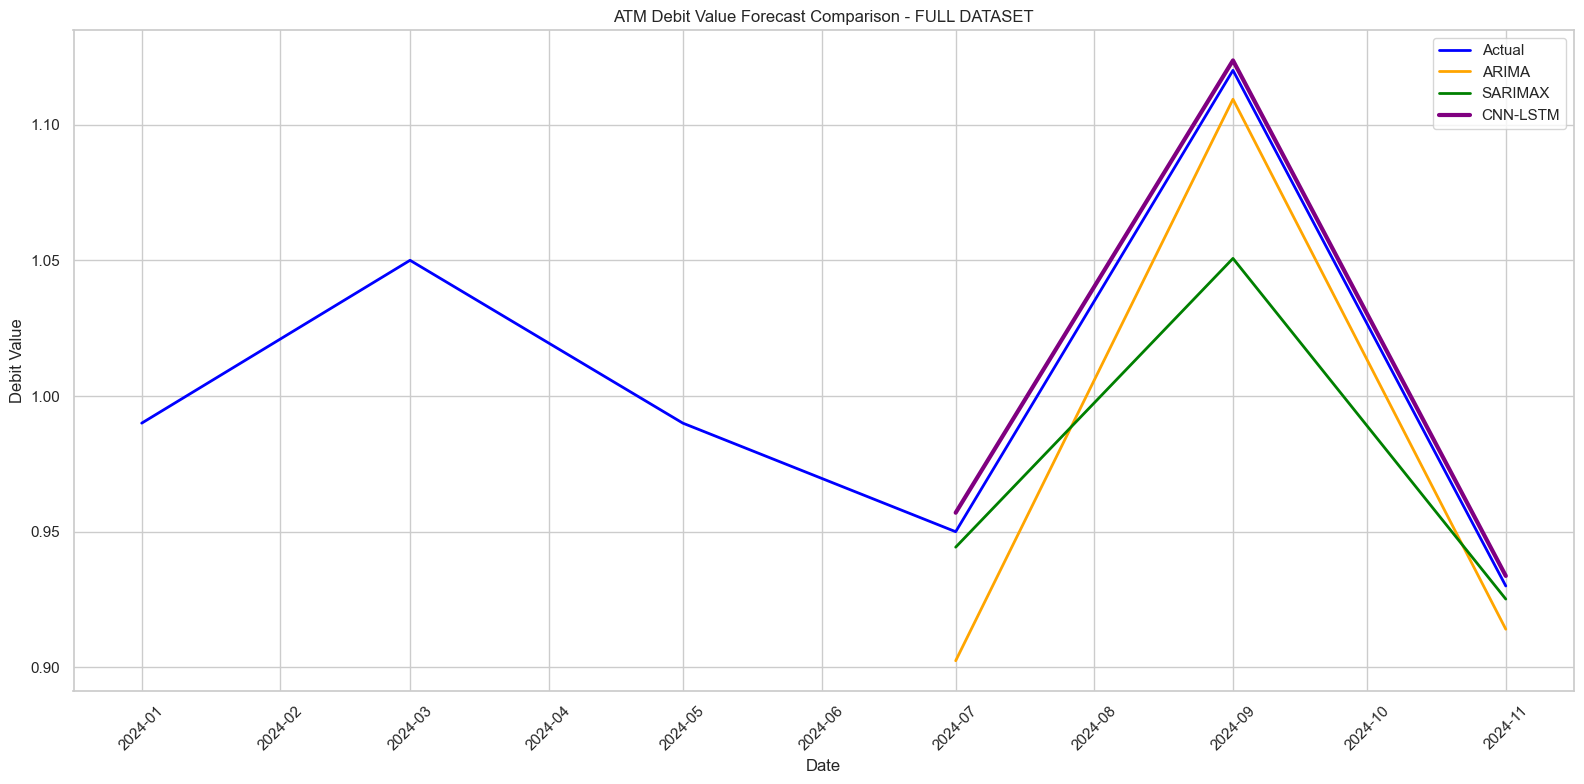

In [40]:
plt.figure(figsize=(16, 8))

# Plot actual values
plt.plot(y, label='Actual', linewidth=2, color='blue')

model_colors = {'ARIMA': 'orange', 'SARIMAX': 'green', 'CNN-LSTM': 'purple'}

for model_name, pred in predictions.items():
    try:
        if hasattr(pred, 'index') and len(pred) > 1:
            plt.plot(pred.index, pred.values, label=model_name,
                     linewidth=3 if model_name == 'CNN-LSTM' else 2,
                     color=model_colors.get(model_name, 'black'),
                     zorder=15 if model_name == 'CNN-LSTM' else 10)
        elif hasattr(pred, '__len__') and len(pred) > 1:
            plt.plot(range(len(pred)), pred, label=model_name,
                     linewidth=3 if model_name == 'CNN-LSTM' else 2,
                     color=model_colors.get(model_name, 'black'),
                     zorder=15 if model_name == 'CNN-LSTM' else 10)
        else:
            plt.scatter(getattr(pred, 'index', [0]),
                        [pred.values[0] if hasattr(pred, 'values') else pred],
                        label=model_name,
                        color=model_colors.get(model_name, 'black'),
                        s=100,
                        zorder=20)
    except Exception as e:
        print(f"Could not plot {model_name}: {e}")

plt.title("ATM Debit Value Forecast Comparison - FULL DATASET")
plt.xlabel("Date")
plt.ylabel("Debit Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
